In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [9]:
avg_age = train_data['Age'].mean()
train_data['Age'].replace(np.nan, avg_age, inplace = True)
avg_age = test_data['Age'].mean()
test_data['Age'].replace(np.nan, avg_age, inplace = True)

In [10]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [11]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
avg_fare = test_data['Fare'].mean()
test_data['Fare'].replace(np.nan, avg_fare, inplace = True)

In [14]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

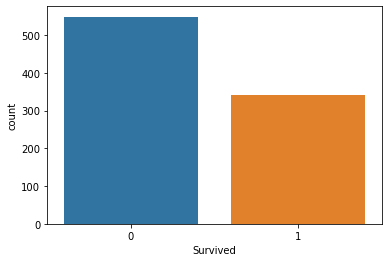

In [15]:
sns.countplot(x = 'Survived', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

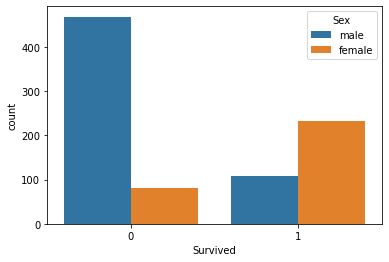

In [16]:
sns.countplot(x = 'Survived',hue = 'Sex', data = train_data)

In [17]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women) * 100

print('Percentage of women survivors: ', rate_women)

Percentage of women survivors:  74.20382165605095


In [18]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men) * 100

print('Percentage of men survivors: ', rate_men)

Percentage of men survivors:  18.890814558058924


<AxesSubplot:xlabel='Pclass', ylabel='count'>

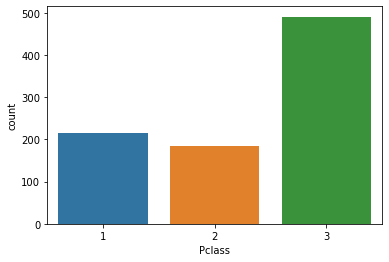

In [19]:
sns.countplot(x = 'Pclass', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

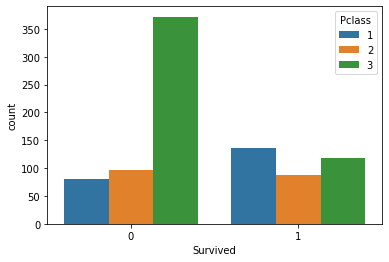

In [20]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = train_data)

In [21]:
first_class = train_data.loc[train_data.Pclass == 1]['Survived']
rate_fc = sum(first_class)/len(first_class) * 100

print('Percentage of first_class survivors: ', rate_fc)

Percentage of first_class survivors:  62.96296296296296


In [22]:
second_class = train_data.loc[train_data.Pclass == 2]['Survived']
rate_fc = sum(second_class)/len(second_class) * 100

print('Percentage of second_class survivors: ', rate_fc)

Percentage of second_class survivors:  47.28260869565217


In [23]:
third_class = train_data.loc[train_data.Pclass == 3]['Survived']
rate_fc = sum(third_class)/len(third_class) * 100

print('Percentage of third_class survivors: ', rate_fc)

Percentage of third_class survivors:  24.236252545824847


<AxesSubplot:xlabel='Survived', ylabel='count'>

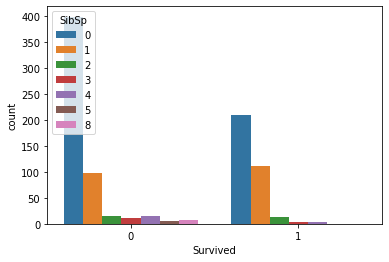

In [24]:
sns.countplot(x = "Survived", hue  = 'SibSp', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

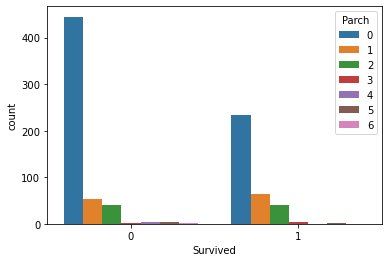

In [25]:
sns.countplot(x = "Survived", hue  = 'Parch', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

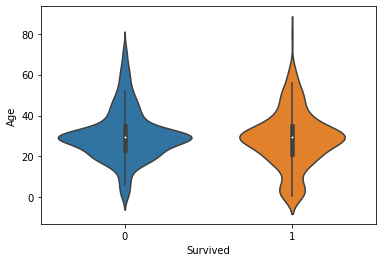

In [26]:
sns.violinplot(x = 'Survived', y = 'Age', data = train_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

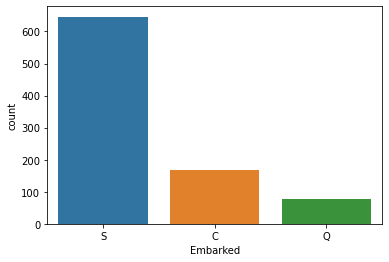

In [27]:
sns.countplot(x = 'Embarked', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

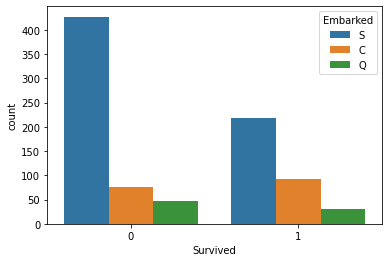

In [28]:
sns.countplot(hue= 'Embarked',x = 'Survived' ,data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

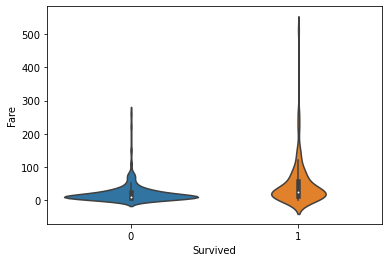

In [29]:
sns.violinplot(x = 'Survived', y = 'Fare', data = train_data)

<AxesSubplot:>

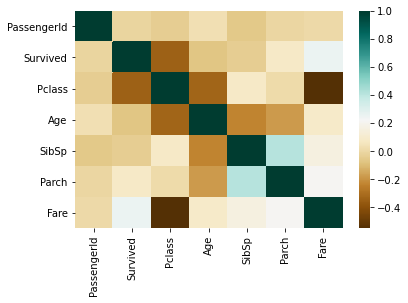

In [30]:
sns.heatmap(train_data.corr(),cmap = 'BrBG')

### one hot encoding

## map()

In [31]:

train_data['Sex'] = train_data['Sex'].map({'female':1, 'male':0}).astype(int)
# map function replace female and male with 1 and 0 respectively 
test_data['Sex'] = test_data['Sex'].map({'female':1, 'male':0}).astype(int)



In [32]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
train_data['Embarked'] = train_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [36]:
train_data.drop(['Name','Ticket'], axis = 1,inplace = True) # axis =1 is for column
test_data.drop(['Name','Ticket'], axis = 1,inplace = True)

In [39]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [40]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

now creating category (bands/bins)

In [41]:
dataset = [train_data,test_data]
for data in dataset:
    data.loc[data['Age'] <= 20 ,'Age'] =0
    data.loc[(data['Age'] > 20 )& (data['Age']<=40),'Age'] =1 
    data.loc[(data['Age'] > 40) & (data['Age']<=60),'Age'] =2     
    data.loc[data['Age'] > 60 ,'Age'] = 3
    

In [42]:
dataset = [train_data,test_data]
for data in dataset:
    data.loc[data['Fare'] <= 8 ,'Fare'] =0
    data.loc[(data['Fare'] > 8 )& (data['Fare']<=15),'Fare'] =1 
    data.loc[(data['Fare'] > 15) & (data['Fare']<=31),'Fare'] =2     
    data.loc[data['Fare'] > 31 ,'Fare'] = 3
    

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,0.0,0
1,2,1,1,1,1.0,1,0,3.0,1
2,3,1,3,1,1.0,0,0,0.0,0
3,4,1,1,1,1.0,1,0,3.0,0
4,5,0,3,0,1.0,0,0,1.0,0


In [46]:
# now converting into int
for data in dataset:
    data['Age']= data['Age'].astype(int)
    data['Fare']= data['Fare'].astype(int)    

In [51]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
881,882,0,3,0,1,0,0,0,0
882,883,0,3,1,1,0,0,1,0
883,884,0,2,0,1,0,0,1,0
884,885,0,3,0,1,0,0,0,0
885,886,0,3,1,1,0,5,2,2
886,887,0,2,0,1,0,0,1,0
887,888,1,1,1,0,0,0,2,0
888,889,0,3,1,1,1,2,2,0
889,890,1,1,0,1,0,0,2,1
890,891,0,3,0,1,0,0,0,2


In [52]:
# creating new empty column 
X_train = train_data.drop(['Survived','PassengerId'], axis = 1,).values
Y_train = train_data['Survived'].values
X_test = test_data.drop('PassengerId',axis = 1).values

In [53]:
print(X_train.shape,Y_train.shape,X_test.shape)

(891, 7) (891,) (418, 7)


In [54]:
# spliting the data 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_train,Y_train,test_size = 0.2,random_state =5)

In [55]:
# creating model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [56]:
# prediction is based on splitted dataset
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)


In [57]:
#checking accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,pred_train)
test_accuracy = accuracy_score(y_test,pred_test)

print("Training Accuracy: ",train_accuracy)
print("Testing Accuracy: ",test_accuracy)

Training Accuracy:  0.7963483146067416
Testing Accuracy:  0.8268156424581006


In [58]:
final_pred = classifier.predict(X_test)

In [60]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = final_pred
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [61]:
# submission.to_csv('titanic_submission2.csv',index = False)

In [ ]:
s